<a href="https://colab.research.google.com/github/INA-95/retail_customer_behavior_analysis/blob/main/walmart_customer_behavior_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# library

import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
file_path = "/content/drive/MyDrive/Side_Project/side_project/Walmart/walmart_data.csv"
df = pd.read_csv(file_path)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# 남자가 여자보다 돈을 더 많이 썼나요?
# 행 하나가 의미하는 값이 뭔지 파악하기 : 해당 고객이 산 상품 ID에 대한 정보임

df[df['User_ID'] == 1000004].groupby(['Product_Category','Product_ID']).value_counts()

<Axes: xlabel='Gender'>

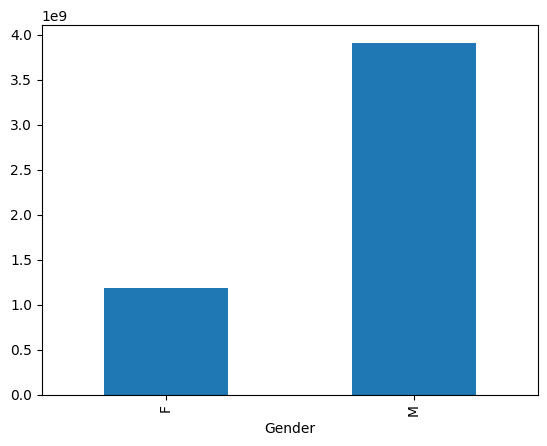

In [5]:
# 남자가 여자보다 돈을 더 많이 사용했는지 보자 : 으흠 남자가 돈을 더 많이 쓰는구만

df.groupby('Gender')['Purchase'].sum().plot(kind = 'bar')

In [6]:
# 이 남자들 특성을 좀 찾아보자고
# 어떤 직업 가지고 있었니? 7번 직업이 많았어요

df_m = df[df['Gender'] == 'M']
df_m.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


In [7]:
# 남자 고유 고객수 : 4225
df_m['User_ID'].nunique()

4225

In [61]:
# 나이
df_m_a = df_m[['User_ID', 'Age']].drop_duplicates()

In [67]:
df_m_a['Age'].value_counts().reset_index().sort_values(by = ['index'])

,index,Age
6,0-17,140
2,18-25,782
0,26-35,1508
1,36-45,834
3,46-50,349
4,51-55,339
5,55+,273


In [70]:
df_m.groupby('Age')['Purchase'].sum().sort_values(ascending = False)

Age
26-35    1588794345
36-45     783130921
18-25     708372833
46-50     304136539
51-55     277633647
55+       154984610
0-17       92527205
Name: Purchase, dtype: int64

In [73]:
df_m[df_m['Age'] == '26-35']['Product_ID'].value_counts()[:10]

P00265242    556
P00110742    493
P00057642    488
P00025442    481
P00112142    480
P00184942    471
P00237542    459
P00058042    441
P00046742    436
P00114942    426
Name: Product_ID, dtype: int64

In [8]:
# User_ID | Occupation
# 남자들은 주로 어떤 직업을 가지고 있나요?

df_m_o = df_m[['User_ID', 'Occupation']].drop_duplicates()

<Axes: >

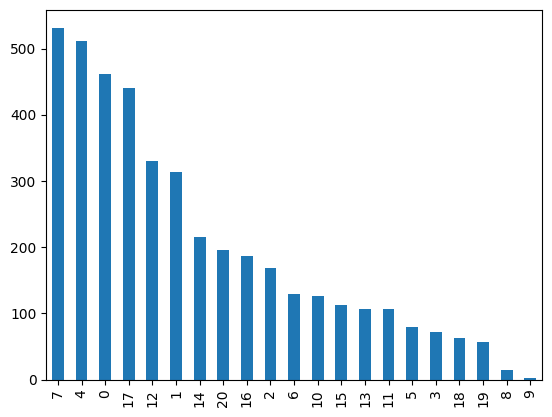

In [27]:
df_m_o['Occupation'].value_counts().plot(kind = 'bar')

In [49]:
df_m.groupby('Occupation')['Purchase'].sum().sort_values(ascending = False).reset_index()

,Occupation,Purchase
0,4,513980163
1,0,475523125
2,7,466193977
3,17,355785294
4,12,273687444
5,1,271807418
6,20,223141466
7,16,201526828
8,14,201444632
9,2,165459113


In [74]:
df_m[df_m['Occupation'] == 4]['Product_ID'].value_counts()

P00265242    207
P00110742    187
P00112142    186
P00237542    178
P00184942    171
            ... 
P00139642      1
P00341442      1
P00262742      1
P00280142      1
P00321442      1
Name: Product_ID, Length: 3043, dtype: int64

In [10]:
# 어디에 살디? : C에 많이 살고 있습니다

df_m_c = df_m[['User_ID','City_Category']].drop_duplicates()

<Axes: >

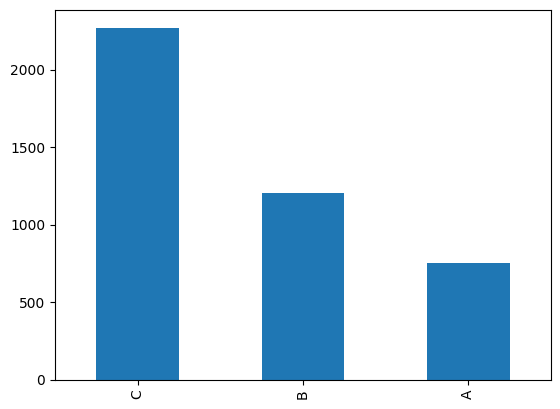

In [11]:
df_m_c['City_Category'].value_counts().plot(kind = 'bar')

In [53]:
df_m.groupby('City_Category')['Purchase'].sum().sort_values(ascending = False).reset_index()

,City_Category,Purchase
0,B,1621916597
1,C,1277521757
2,A,1010141746


In [75]:
df_m[df_m['City_Category'] == 'C']['Product_ID'].value_counts()

P00265242    634
P00025442    581
P00112142    563
P00110742    539
P00184942    535
            ... 
P00298842      1
P00340742      1
P00071742      1
P00002742      1
P00347042      1
Name: Product_ID, Length: 3293, dtype: int64

In [12]:
# 결혼은 했던가? : 거진 미혼이던데요

df_m_m = df_m[['User_ID', 'Marital_Status']].drop_duplicates()

In [13]:
df_m_m['Marital_Status'].value_counts()

0    2470
1    1755
Name: Marital_Status, dtype: int64

In [55]:
df_m.groupby('Marital_Status')['Purchase'].sum()

Marital_Status
0    2324773320
1    1584806780
Name: Purchase, dtype: int64

In [80]:
df_m[df_m['Marital_Status'] == 0]['Product_ID'].value_counts()

P00265242    796
P00025442    765
P00110742    746
P00112142    739
P00057642    729
            ... 
P00011642      1
P00203242      1
P00069442      1
P00283742      1
P00284342      1
Name: Product_ID, Length: 3472, dtype: int64